#Proyecto Módulo 6 - Metodologías agiles

---



###Presentado por:
* Sebastian Rendón Patiño
* Andrés Felipe Aristizábal Miranda

---
Conjunto de datos.
[Chest X-Ray Images (Pneumonia) with new class](https://www.kaggle.com/datasets/ahmedhaytham/chest-xray-images-pneumonia-with-new-class?rvi=1)

##1. Instalación e importación de librerías

In [ ]:
!pip install opencv-python

In [ ]:
import os
import pdb
import random
from glob import glob

import cv2
from cv2.gapi import RGB2Gray

import numpy as np
import pandas as pd
import sklearn
from tqdm import tqdm
import matplotlib.pyplot as plt
import skimage
from skimage.transform import resize
from skimage.color import rgb2gray

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, save_model, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##2. Conexión con la fuente de datos y descarga de conjunto de datos

In [ ]:
import zipfile

# Ruta al archivo .zip que deseas descomprimir
#archivo_zip = '/content/drive/MyDrive/Colab Notebooks/Cursos/UNAL/x-rays.zip'
archivo_zip = './drive/MyDrive/Diplomado En Machine Learning/Módulo 5 - Redes Neuronales/Proyecto Aplicado/x-rays.zip'

# Directorio de destino donde se descomprimirán los archivos (la misma carpeta)
directorio_destino = '/content/'

# Abre el archivo .zip
with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    # Extrae todos los archivos en el directorio de destino
    zip_ref.extractall(directorio_destino)

print(f'Archivos descomprimidos en: {directorio_destino}')

Archivos descomprimidos en: /content/


In [ ]:
files = os.listdir("./Data_blance")

# Imprimir el contenido de la carpeta

for file in files:
    print(file)

Train
Test
Val


##3. Función de preprocesamiento, clasificación y etiquetado de imágenes

In [ ]:
train_dir = "Data_blance/Train"
test_dir = "Data_blance/Test"
val_dir = "Data_blance/Val"

load_from_images = True

def get_data(folder):
    """
    Carga imágenes desde una carpeta y las prepara para su uso en entrenamiento y prueba.

    Parameters:
    - folder (str): Ruta de la carpeta que contiene subcarpetas con imágenes.

    Returns:
    - X (numpy.ndarray): Matriz de características que representa las imágenes.
    - y (numpy.ndarray): Matriz de etiquetas correspondientes a las clases de las imágenes.

    Note:
    - Las clases se asignan de acuerdo con las subcarpetas 'bacteria', 'Normal', 'virus', y otras.
    - Las imágenes se redimensionan a 150x150 píxeles y se convierten a escala de grises.

    Example:
    ```python
    X_train, y_train = get_data('/ruta/a/los/datos_de_entrenamiento')
    X_test, y_test = get_data('/ruta/a/los/datos_de_prueba')
    ```
    """
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['bacteria']:
                label = 0
            elif folderName in ['Normal']:
                label = 1
            elif folderName in ['virus']:
                label = 2
            else:
                label = 3
            for image_filename in tqdm(os.listdir(folder + '/' + folderName)):
                img_file = cv2.imread(folder + '/' + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (150, 150, 3), mode='constant')
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)

    return X, y

if load_from_images:
    X_train, y_train = get_data(train_dir)
    X_test, y_test = get_data(test_dir)
    X_val, y_val = get_data(val_dir)

    np.save('xtrain.npy', X_train)
    np.save('ytrain', y_train)
    np.save('xtest.npy', X_test)
    np.save('ytest', y_test)
    np.save('xval.npy', X_val)
    np.save('yval', y_val)
else:
    X_train = np.load('xtrain.npy')
    y_train = np.load('ytrain.npy')
    X_test = np.load('xtest.npy')
    y_test = np.load('ytest.npy')
    X_val = np.load('xval.npy')
    y_val = np.load('yval.npy')

100%|██████████| 93/93 [00:52<00:00,  1.79it/s]


##4. Visualización de imágenes, para cada una de las categorías

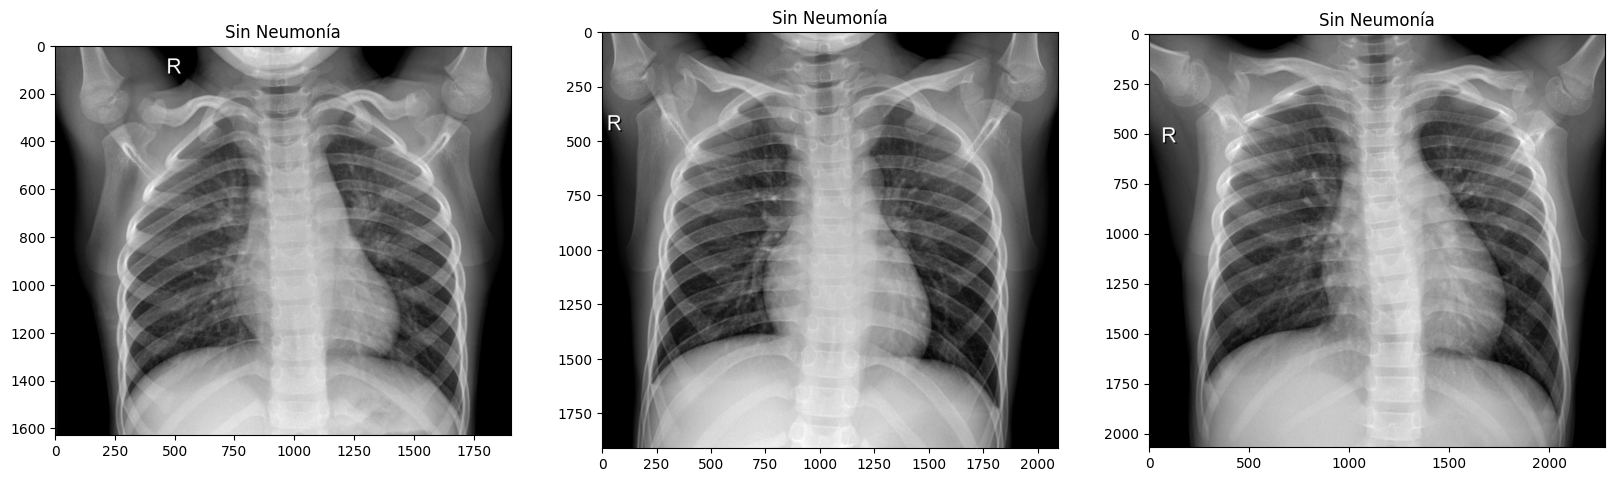

In [ ]:
multiple_images = glob("./Data_blance/Train/Normal/**")
def plot_three_images(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.title("Sin Neumonía")
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.title("Sin Neumonía")
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.title("Sin Neumonía")
    plt.imshow(cv2.imread(r[2]))
plot_three_images(multiple_images)

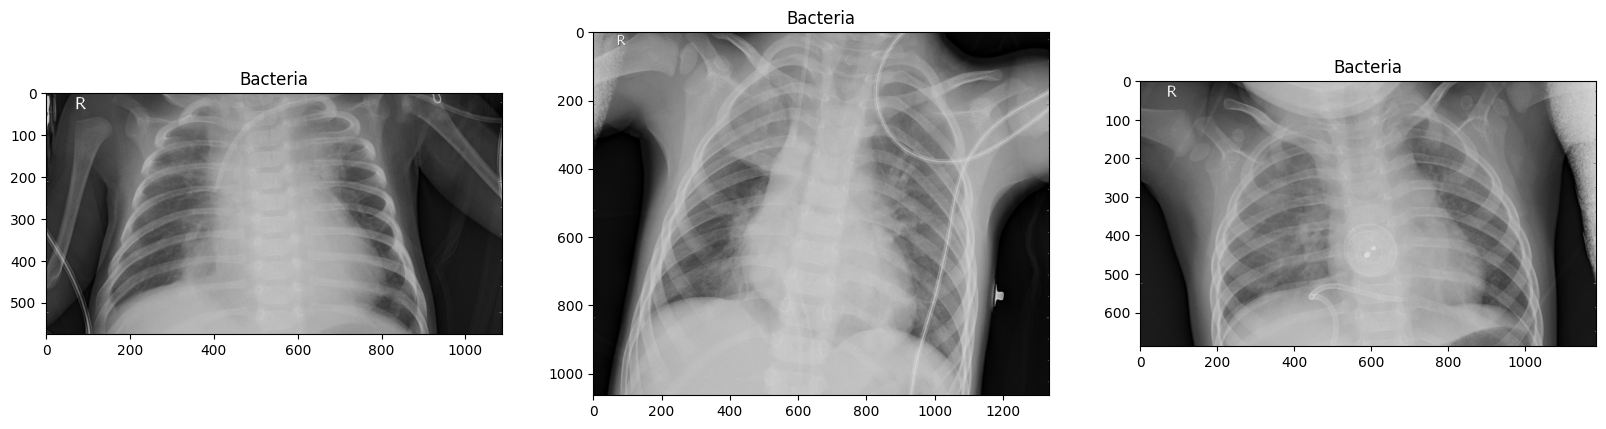

In [ ]:
multiple_images = glob("./Data_blance/Train/bacteria/**")
def plot_three_images(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.title("Bacteria")
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.title("Bacteria")
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.title("Bacteria")
    plt.imshow(cv2.imread(r[2]))
plot_three_images(multiple_images)

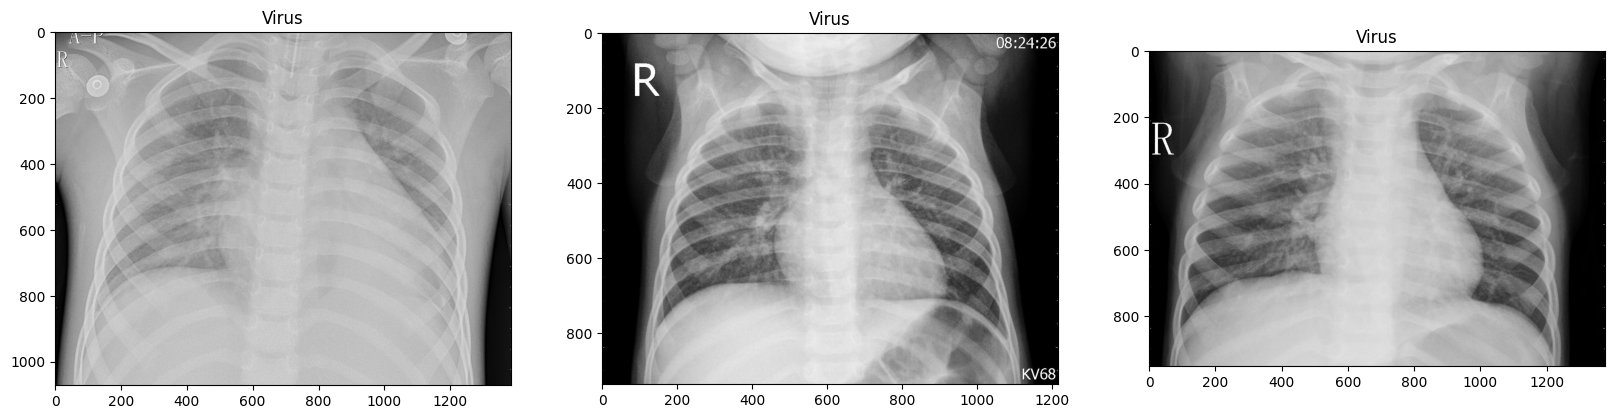

In [ ]:
multiple_images = glob("./Data_blance/Train/virus/**")
def plot_three_images(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.title("Virus")
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.title("Virus")
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.title("Virus")
    plt.imshow(cv2.imread(r[2]))
plot_three_images(multiple_images)

##5. Impresión de la forma para cada uno de los subconjuntos de datos, Test, Train y Validation

In [ ]:
dataxtest = X_test.shape
dataytest = y_test.shape
dataxtrain = X_train.shape
dataytrain = y_train.shape
dataxval = X_val.shape
datayval = y_val.shape

print(f"Forma de X_Test{dataxtest}")
print(f"Forma de y_Test{dataytest}")
print(f"Forma de X_Train{dataxtrain}")
print(f"Forma de y_Train{dataytrain}")
print(f"Forma de X_Val{dataxval}")
print(f"Forma de y_Val{datayval}")

Forma de X_Test(300, 150, 150, 3)
Forma de y_Test(300,)
Forma de X_Train(3900, 150, 150, 3)
Forma de y_Train(3900,)
Forma de X_Val(279, 150, 150, 3)
Forma de y_Val(279,)


In [ ]:
X_train = X_train.reshape(-1, 150, 150, 3)
X_val = X_val.reshape(-1, 150, 150, 3)
X_test = X_test.reshape(-1, 150, 150, 3)

In [ ]:
num_classes = 3

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

In [ ]:
print(f"Forma de X_Train {X_train.shape}")
print(f"Forma de y_Train {y_train.shape}")
print(f"Forma de X_Test {X_test.shape}")
print(f"Forma de y_Test {y_test.shape}")
print(f"Forma de X_Val {X_val.shape}")
print(f"Forma de y_Val {y_val.shape}")

Forma de X_Train (3900, 150, 150, 3)
Forma de y_Train (3900, 3)
Forma de X_Test (300, 150, 150, 3)
Forma de y_Test (300, 3)
Forma de X_Val (279, 150, 150, 3)
Forma de y_Val (279, 3)


In [ ]:
import gc
tf.keras.backend.clear_session
gc.collect()

30111

##6. Creación del modelo convolucional y Entrenamiento del modelo 1 usando Keras

In [ ]:
# CONVOLUTION

input_layer = Input(shape=(150, 150, 3))
conv1 = Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu')(input_layer)
conv2 = Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu')(conv1)
pool1 = MaxPool2D(pool_size=(2,2), strides=(2,2))(conv2)

conv3 = Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(pool1)
conv4 = Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(conv3)
pool2 = MaxPool2D(pool_size=(2,2), strides=(2,2))(conv4)

conv5 = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(pool2)
conv6 = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(conv5)
pool3 = MaxPool2D(pool_size=(2,2), strides=(2,2))(conv6)

# FLATTEN

flat = Flatten()(pool3)

# NEURONAL NETWORK

fc1 = Dense(units=516, activation='relu', kernel_regularizer= tf.keras.regularizers.L2(0.01))(flat)
drop = Dropout(0.35)(fc1)
fc2 = Dense(units=516, activation='relu', kernel_regularizer= tf.keras.regularizers.L2(0.01))(drop)
drop1 = Dropout(0.4)(fc2)

output = Dense(units=3, activation='softmax')(drop1)

# SUMMARY
gonodactylus_simithii = Model(input_layer, output)
gonodactylus_simithii.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 8)       224       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 8)       584       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 8)         0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 16)        1168      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 16)        2320      
                                                             

In [ ]:
# COMPILE MODEL
gonodactylus_simithii.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# CALLBACKS
best_callback = tf.keras.callbacks.ModelCheckpoint(
                                                      filepath="best_Weights.h5",
                                                      monitor="val_accuracy",
                                                      verbose=True,
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      mode="max"
                                                      )

stopping_callback = tf.keras.callbacks.EarlyStopping(
                                                      monitor="val_accuracy",
                                                      patience=20,
                                                      verbose=2,
                                                      mode="max",
                                                      restore_best_weights=True,
                                                      )

In [ ]:
firstTraining = gonodactylus_simithii.fit(
                                            X_train, y_train,
                                            epochs=350,
                                            batch_size=64,
                                            validation_data=(X_val, y_val),
                                            verbose=1,
                                            callbacks=[best_callback, stopping_callback]
                                          )

Epoch 1/350
61/61 [==============================] - ETA: 0s - loss: 3.9769 - accuracy: 0.5462
Epoch 1: val_accuracy improved from -inf to 0.68459, saving model to best_Weights.h5
61/61 [==============================] - 18s 65ms/step - loss: 3.9769 - accuracy: 0.5462 - val_loss: 1.1681 - val_accuracy: 0.6846
Epoch 2/350
60/61 [============================>.] - ETA: 0s - loss: 0.9679 - accuracy: 0.7008
Epoch 2: val_accuracy improved from 0.68459 to 0.69534, saving model to best_Weights.h5
61/61 [==============================] - 3s 45ms/step - loss: 0.9675 - accuracy: 0.6997 - val_loss: 0.8564 - val_accuracy: 0.6953
Epoch 3/350
61/61 [==============================] - ETA: 0s - loss: 0.7832 - accuracy: 0.7408
Epoch 3: val_accuracy improved from 0.69534 to 0.74194, saving model to best_Weights.h5
61/61 [==============================] - 3s 45ms/step - loss: 0.7832 - accuracy: 0.7408 - val_loss: 0.7024 - val_accuracy: 0.7419
Epoch 4/350
60/61 [============================>.] - ETA: 0s - 

###6.1 Gráficos para representar las métricas del modelo. (Accuracy, Confusion Matrix y F1 Score)

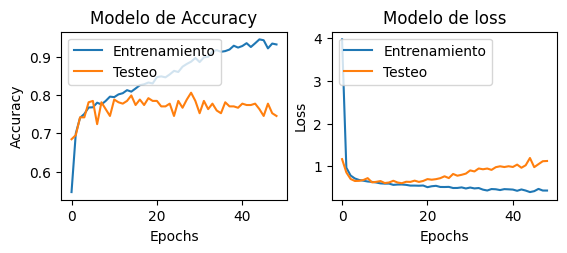

10/10 [==============================] - 0s 16ms/step
              precision    recall  f1-score   support

    Bacteria       0.76      0.69      0.72       100
      Normal       0.86      0.91      0.88       100
       Virus       0.67      0.69      0.68       100

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300

------------------------------------------------------------------------------


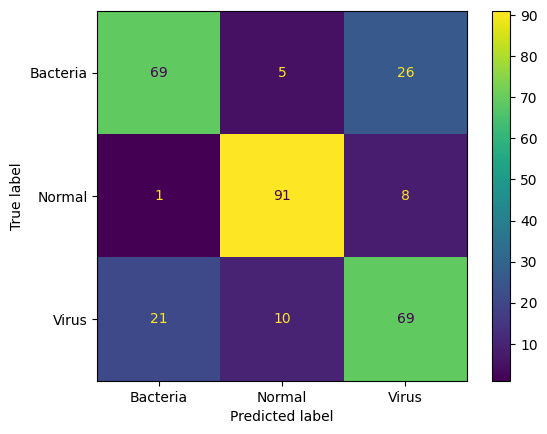

------------------------------------------------------------------------------


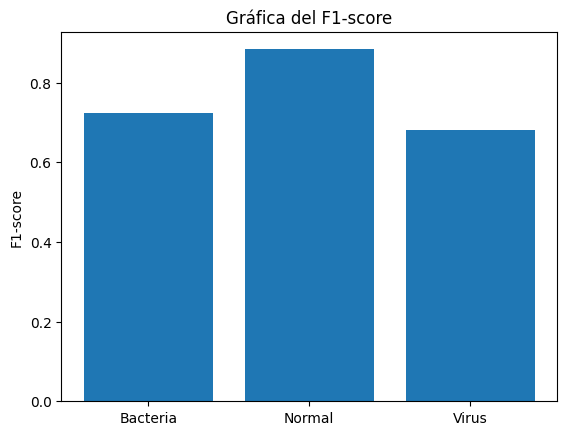

In [ ]:
# GRÁFICO DE ACCURACY
plt.subplot(2, 2, 1)
plt.plot(firstTraining.history['accuracy'])
plt.plot(firstTraining.history['val_accuracy'])
plt.title("Modelo de Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento', 'Testeo'], loc='upper left')

#-------------------------------------------------------------------------------

# GRÁFICO DE LOSS
plt.subplot(2, 2, 2)
plt.plot(firstTraining.history['loss'])
plt.plot(firstTraining.history['val_loss'])
plt.title("Modelo de loss")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento', 'Testeo'], loc='upper left')
plt.show()

#-------------------------------------------------------------------------------

# GRÁFICO DE MATRIZ DE CONFUSIÓN

# Realiza predicciones en el conjunto de prueba
y_pred = gonodactylus_simithii.predict(X_test)
# Convierte las matrices codificadas one-hot a etiquetas de clase
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)
# Define las etiquetas de clase correspondientes a tus clases
clases = ['Bacteria', 'Normal', 'Virus']
# Calcula la matriz de confusión
confusion = confusion_matrix(y_test_labels, y_pred_labels, labels=range(len(clases)))
# Imprime el informe de clasificación que incluye precision, recall y f1-score por clase
print(classification_report(y_test_labels, y_pred_labels, target_names=clases))

print("------------------------------------------------------------------------------")

# Crea un gráfico de matriz de confusión
disp = ConfusionMatrixDisplay(confusion, display_labels=clases)
disp.plot()

# Mostrar las gráficas
plt.show()

print("------------------------------------------------------------------------------")
#-------------------------------------------------------------------------------

#GRÁFICO DE F1

# Generar el informe de clasificación
report = classification_report(y_test_labels, y_pred_labels, output_dict=True)

# Obtener las métricas de interés
f1_scores = [report[str(i)]['f1-score'] for i in range(3)]

# Crear el gráfico de barras
fig, ax = plt.subplots()
ax.bar(range(3), f1_scores)
ax.set_xticks(range(3))
ax.set_xticklabels(['Bacteria', 'Normal', 'Virus'])
ax.set_ylabel('F1-score')
ax.set_title('Gráfica del F1-score')
plt.show()


In [ ]:
loss, acc = gonodactylus_simithii.evaluate(X_test, y_test, verbose=1)
print("The loss is: {0}, and the accuracy is: {1}".format(loss, acc))

10/10 [==============================] - 0s 13ms/step - loss: 0.8611 - accuracy: 0.7633
The loss is: 0.8610646724700928, and the accuracy is: 0.7633333206176758


##7. Creación del modelo convolucional y entrenamiento del modelo 1 usando Transfer Learning

In [ ]:
extractor = tf.keras.applications.VGG16(weights='imagenet',
                                                include_top=False,
                                                input_shape=(150, 150, 3))

for layer in extractor.layers:
    layer.trainable = False

x = extractor.output
x = Flatten()(x)
x = Dense(512, activation='relu', kernel_regularizer= tf.keras.regularizers.L2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', kernel_regularizer= tf.keras.regularizers.L2(0.001))(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)

transferLearning_model = Model(inputs=extractor.input, outputs=output)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
transferLearning_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
SecondTraining = transferLearning_model.fit(
    X_train, y_train,
    epochs=350,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1,
    callbacks=[best_callback, stopping_callback]
)

Epoch 1/350
61/61 [==============================] - ETA: 0s - loss: 1.5966 - accuracy: 0.6185
Epoch 1: val_accuracy did not improve from 0.80645
61/61 [==============================] - 18s 216ms/step - loss: 1.5966 - accuracy: 0.6185 - val_loss: 1.0349 - val_accuracy: 0.7384
Epoch 2/350
61/61 [==============================] - ETA: 0s - loss: 1.0395 - accuracy: 0.7249
Epoch 2: val_accuracy did not improve from 0.80645
61/61 [==============================] - 8s 137ms/step - loss: 1.0395 - accuracy: 0.7249 - val_loss: 0.9057 - val_accuracy: 0.7491
Epoch 3/350
61/61 [==============================] - ETA: 0s - loss: 0.9143 - accuracy: 0.7544
Epoch 3: val_accuracy did not improve from 0.80645
61/61 [==============================] - 8s 137ms/step - loss: 0.9143 - accuracy: 0.7544 - val_loss: 0.7856 - val_accuracy: 0.7849
Epoch 4/350
61/61 [==============================] - ETA: 0s - loss: 0.8405 - accuracy: 0.7444
Epoch 4: val_accuracy did not improve from 0.80645
61/61 [===============

###7.1 Gráficos para representar las métricas del modelo de transfer learning. (Accuracy, Confusion Matrix y F1 Score)

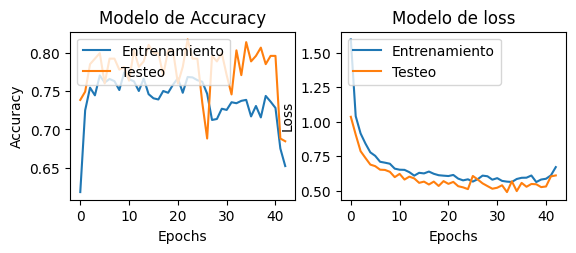

10/10 [==============================] - 1s 74ms/step
              precision    recall  f1-score   support

    Bacteria       0.68      0.86      0.76       100
      Normal       0.97      0.96      0.96       100
       Virus       0.77      0.57      0.66       100

    accuracy                           0.80       300
   macro avg       0.81      0.80      0.79       300
weighted avg       0.81      0.80      0.79       300

------------------------------------------------------------------------------


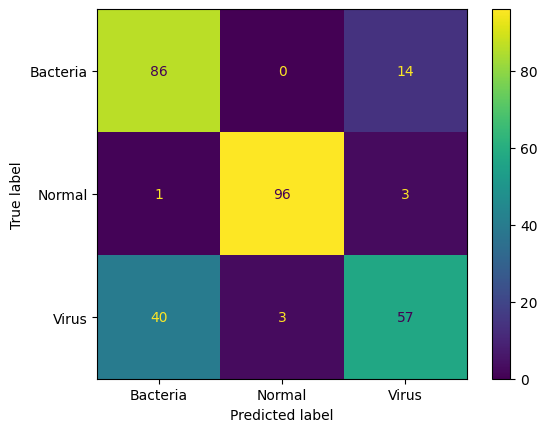

10/10 [==============================] - 1s 69ms/step


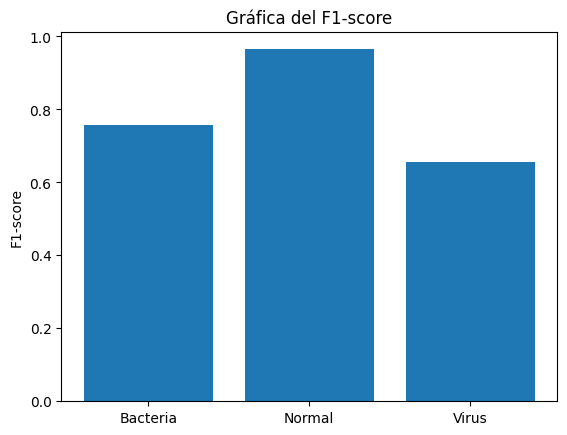

In [ ]:
# GRÁFICO DE ACCURACY
plt.subplot(2, 2, 1)
plt.plot(SecondTraining.history['accuracy'])
plt.plot(SecondTraining.history['val_accuracy'])
plt.title("Modelo de Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento', 'Testeo'], loc='upper left')

#-------------------------------------------------------------------------------

# GRÁFICO DE LOSS
plt.subplot(2, 2, 2)
plt.plot(SecondTraining.history['loss'])
plt.plot(SecondTraining.history['val_loss'])
plt.title("Modelo de loss")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento', 'Testeo'], loc='upper left')
plt.show()

#-------------------------------------------------------------------------------

# GRÁFICO DE MATRIZ DE CONFUSIÓN

# Realiza predicciones en el conjunto de prueba
y_pred_m2 = transferLearning_model.predict(X_test)
# Convierte las matrices codificadas one-hot a etiquetas de clase
y_test_labels_m2 = np.argmax(y_test, axis=1)
y_pred_labels_m2 = np.argmax(y_pred_m2, axis=1)
# Define las etiquetas de clase correspondientes a tus clases
clases = ['Bacteria', 'Normal', 'Virus']
# Calcula la matriz de confusión
confusion = confusion_matrix(y_test_labels_m2, y_pred_labels_m2, labels=range(len(clases)))
# Imprime el informe de clasificación que incluye precision, recall y f1-score por clase
print(classification_report(y_test_labels_m2, y_pred_labels_m2, target_names=clases))
print("------------------------------------------------------------------------------")

# Crea un gráfico de matriz de confusión
disp = ConfusionMatrixDisplay(confusion, display_labels=clases)
disp.plot()

# Mostrar las gráficas
plt.show()

#-------------------------------------------------------------------------------

#GRÁFICO DE F1

y_pred_F1_m2 = transferLearning_model.predict(X_test)
y_pred_F1_m2 = np.argmax(y_pred_F1_m2, axis=1)

y_test_labels_F1_m2 = np.argmax(y_test, axis=1)
report2 = classification_report(y_test_labels_F1_m2, y_pred_F1_m2, output_dict=True)

# Obtener las métricas de interés
f1_score2 = [report2[str(i)]['f1-score'] for i in range(3)]

fig2, ax2 = plt.subplots()
ax2.bar(range(3), f1_score2)
ax2.set_xticks(range(3))
ax2.set_xticklabels(['Bacteria', 'Normal', 'Virus'])
ax2.set_ylabel('F1-score')
ax2.set_title('Gráfica del F1-score')
plt.show()



"loss: 0.4548 - accuracy: 0.8100": Aquí se muestran las métricas de pérdida y precisión (accuracy) en el conjunto de prueba. Estos valores son los resultados de la evaluación del modelo en los datos de prueba.

"loss: 0.4548" indica que la pérdida promedio en el conjunto de prueba es aproximadamente 0.4548. La pérdida es una medida de qué tan bien se están haciendo las predicciones del modelo, y en general, se busca que sea lo más bajo posible.
"accuracy: 0.8100" indica que la precisión promedio en el conjunto de prueba es aproximadamente 0.8100 o 81%. Esto significa que el modelo acertó en alrededor del 81% de las predicciones en el conjunto de prueba. La precisión es una medida de qué tan bien el modelo clasifica los datos.
En resumen, el resultado muestra el progreso de la evaluación de los lotes, el tiempo que tomó y las métricas de pérdida y precisión en el conjunto de prueba. En este caso, el modelo obtuvo una pérdida de aproximadamente 0.4548 y una precisión de aproximadamente 81% en el conjunto de prueba.

10/10 [==============================] - 1s 75ms/step


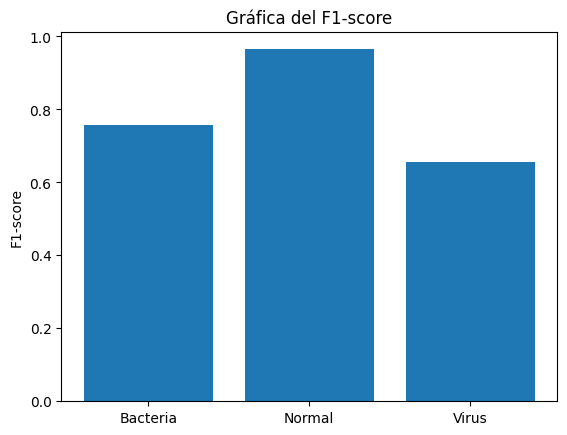

In [ ]:
y_pred_F1_m2 = transferLearning_model.predict(X_test)
y_pred_F1_m2 = np.argmax(y_pred_F1_m2, axis=1)

y_test_labels_F1_m2 = np.argmax(y_test, axis=1)
report2 = classification_report(y_test_labels_F1_m2, y_pred_F1_m2, output_dict=True)

# Obtener las métricas de interés
f1_score2 = [report2[str(i)]['f1-score'] for i in range(3)]

fig2, ax2 = plt.subplots()
ax2.bar(range(3), f1_score2)
ax2.set_xticks(range(3))
ax2.set_xticklabels(['Bacteria', 'Normal', 'Virus'])
ax2.set_ylabel('F1-score')
ax2.set_title('Gráfica del F1-score')
plt.show()

In [ ]:
loss2, acc2 = transferLearning_model.evaluate(X_test, y_test, verbose=1)
print("The loss is: {0}, and the accuracy is: {1}".format(loss2, acc2))

10/10 [==============================] - 1s 73ms/step - loss: 0.5250 - accuracy: 0.7967
The loss is: 0.5250442624092102, and the accuracy is: 0.79666668176651
